1-EDA

=== Aperçu des 5 premières lignes ===
   Unnamed: 0                                              tweet  sarcastic  \
0           0  The only thing I got from college is a caffein...          1   
1           1  I love it when professors draw a big question ...          1   
2           2  Remember the hundred emails from companies whe...          1   
3           3  Today my pop-pop told me I was not “forced” to...          1   
4           4  @VolphanCarol @littlewhitty @mysticalmanatee I...          1   

                                            rephrase  sarcasm  irony  satire  \
0  College is really difficult, expensive, tiring...      0.0    1.0     0.0   
1  I do not like when professors don’t write out ...      1.0    0.0     0.0   
2  I, at the bare minimum, wish companies actuall...      0.0    1.0     0.0   
3  Today my pop-pop told me I was not "forced" to...      1.0    0.0     0.0   
4  I would say Ted Cruz is an asshole and doesn’t...      1.0    0.0     0.0   

   und

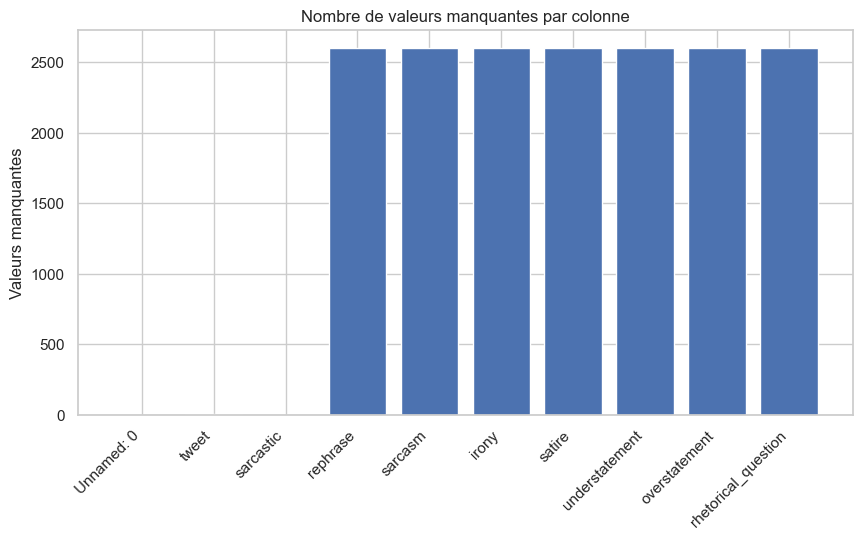

=== Statistiques descriptives ===
         Unnamed: 0                                              tweet  \
count   3468.000000                                               3467   
unique          NaN                                               3456   
top             NaN  @AsdaServiceTeam imagine your delivery being 2...   
freq            NaN                                                  4   
mean    1733.500000                                                NaN   
std     1001.269694                                                NaN   
min        0.000000                                                NaN   
25%      866.750000                                                NaN   
50%     1733.500000                                                NaN   
75%     2600.250000                                                NaN   
max     3467.000000                                                NaN   

          sarcastic rephrase     sarcasm       irony      satire  \
count   3

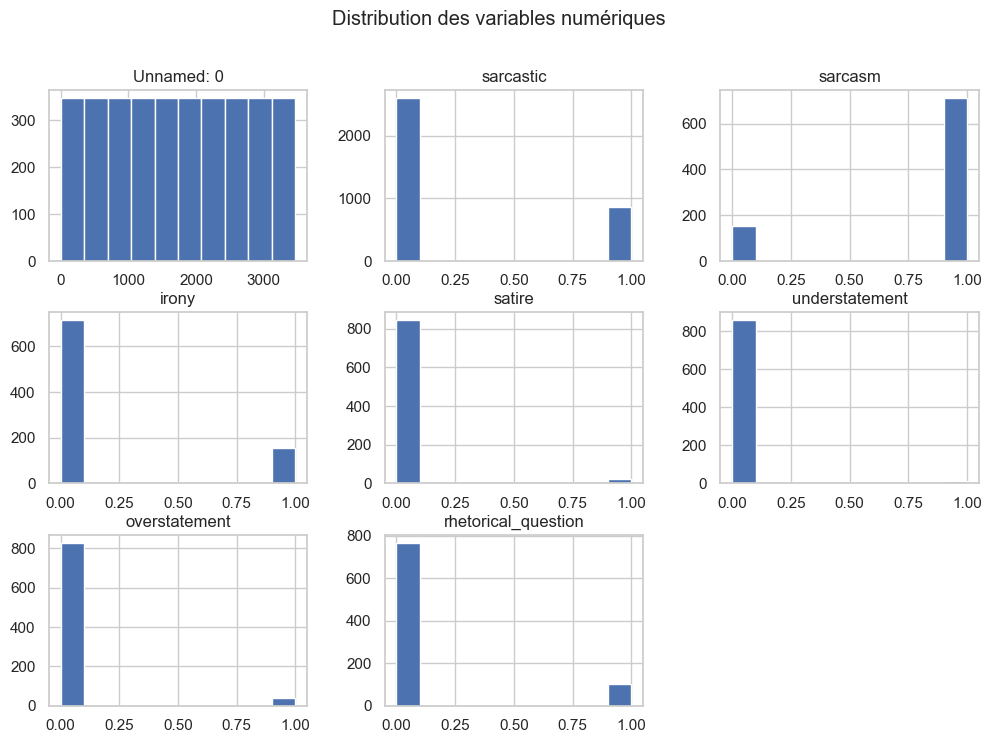

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import re
#from sklearn.feature_extraction.text import TfidfVectorizer




# =============================
# 1️⃣ Chargement du dataset
# =============================
train_data = pd.read_csv('train.En.csv')
test_data=pd.read_csv('task_A_En_test.csv')

# =============================
# 2️⃣ Aperçu des données
# =============================
print("=== Aperçu des 5 premières lignes ===")
print(train_data.head(), "\n")

print("=== Dimensions du dataset (lignes, colonnes) ===")
print(train_data.shape, "\n")

print("=== Types de données ===")
print(train_data.dtypes, "\n")

# =============================
# 3️⃣ Informations générales
# =============================
print("=== Informations générales ===")
train_data.info()
print("\n")

# =============================
# 4️⃣ Valeurs manquantes
# =============================
print("=== Valeurs manquantes par colonne ===")
print(train_data.isnull().sum(), "\n")

# Visualisation simple des valeurs manquantes
plt.figure(figsize=(10, 5))
plt.bar(train_data.columns, train_data.isnull().sum())
plt.xticks(rotation=45, ha='right')
plt.title("Nombre de valeurs manquantes par colonne")
plt.ylabel("Valeurs manquantes")
plt.show()

# =============================
# 5️⃣ Statistiques descriptives
# =============================
print("=== Statistiques descriptives ===")
print(train_data.describe(include='all'), "\n")

# =============================
# 6️⃣ Distribution des variables numériques
# =============================
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

if len(num_cols) > 0:
    train_data[num_cols].hist(figsize=(12, 8))
    plt.suptitle("Distribution des variables numériques")
    plt.show()
else:
    print("Aucune variable numérique détectée.\n")






2-Pretraitement et visualisation

In [67]:
train_data=train_data[["tweet","sarcastic"]]

train_data.isnull().sum()/len(train_data) # Vérification après suppression
train_data


,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1
...,...,...
3463,The population spike in Chicago in 9 months is...,0
3464,You'd think in the second to last English clas...,0
3465,I’m finally surfacing after a holiday to Scotl...,0
3466,Couldn't be prouder today. Well done to every ...,0


In [86]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)       # remove URLs
    text = re.sub(r"@\w+", "", text)                 # remove mentions
    text = re.sub(r"#", "", text)                    # remove hashtag symbol
    text = re.sub(r"[^a-zA-Z\s]", "", text)          # keep letters and spaces
    text = re.sub(r"\s+", " ", text).strip()         # remove extra spaces
    return text



def clean_data(df):
    df["tweet"]=df["tweet"].apply(str).apply(clean_text)
    return df
train_data=clean_data(train_data)[['tweet','sarcastic']]
train_data
test_data=clean_data(test_data)
test_data



,tweet,sarcastic
0,size on the the toulouse team that pack is mon...,0
1,pinball,0
2,so the scottish government want people to get ...,1
3,villainous pro tip change the device name on h...,0
4,i would date any of these men,0
...,...,...
1395,ive just seen this and felt it deserved a retw...,0
1396,omg how an earth is that a pen,0
1397,bringing kanye and drake to a tl near you,0
1398,i love it when women are referred to as girl b...,1


In [ ]:

tweets = text_data['tweet'].tolist()
print(tweets)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(tweets)

print(tfidf.get_feature_names_out())
print(X.toarray())


['the only thing i got from college is a caffeine addiction', 'i love it when professors draw a big question mark next to my answer on an exam because im always like yeah i dont either', 'remember the hundred emails from companies when covid started getting real ive gotten three in regards to support for protests and only shared helpful links and actually said black lives matter we love capitalism', 'today my poppop told me i was not forced to go to college okay sure sureeee', 'i did too and i also reported cancun cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to mexico', 'i choose to interpret it as xd the universal emoticon for laughing at those poor poor folks in ubisofts marketing department who have to deal with that branding until the servers quietly shut down months after launch', 'why would alexas recipe for yorkshire pudding be a bhaji yorkshire pudding', 'someone hit me w a horse tranquilizer istg ive been in a pool of swea

In [ ]:
def train_model(x_train,y_train,Model):
    model=Model()
    model.fit(x_train, y_train)

